# **Instituto Tecnológico de Monterrey**

Maestría en Inteligencia Artificial Aplicada

Equipo 4

Nancy Elena Estanislao Lizárraga - A01169334

Héctor Raúl Vázquez González - A00565542

Gustavo Rene Ramos Ojeda - A01793599

Importación de Las librerías necesarias


In [1]:
#Obtención de Datos
import pandas as pd
#Escalamiento
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
#Análisis de Características
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing

# **Obtención de Datos y Formación del Primer Dataframe**



El archivo con la información con la que trabajaremos, se encuentra en una ruta en internet.

Esta información se obtendrá de este sitio (github) y que almacenará en un Dataframe de la librería pandas para comenzar con el procesamiento de esta.

In [2]:
#Path del archivo CSV con la información con la que vamos a Trabajar
FilePath = 'https://raw.githubusercontent.com/gusrro/ProyectoIntegrador/main/dataF.csv'

In [3]:
#Creación del Dataframe usando el path del archivo
df_original = pd.read_csv(FilePath)

In [4]:
#Mostramos la información contenida en el dataframe
#con la finalidad de corroborar que se ha cargado correctamente
df_original.head(10)

,day,mont,year,credited,debited,type,week_day,perc_remain
0,1,6,2020,1.040468e+07,7921941.905,N,1,0.238618
1,2,6,2020,8.616164e+06,7062377.510,N,2,0.180334
2,3,6,2020,7.872212e+06,6372551.002,N,3,0.190501
3,4,6,2020,7.835058e+06,6331527.590,N,4,0.191898
4,5,6,2020,8.701642e+06,7060386.510,N,5,0.188614
5,6,6,2020,2.657577e+06,1226194.225,N,6,0.538604
6,7,6,2020,NaN,NaN,N,7,NaN
7,8,6,2020,8.171846e+06,6539346.490,N,1,0.199771
8,9,6,2020,7.043053e+06,5402860.945,N,2,0.232881
9,10,6,2020,7.921840e+06,6405740.562,N,3,0.191382


In [5]:
#Checamos cual es el tamaño de nuestro Dataframe original
df_original.shape

(1012, 8)

In [6]:
df_segundo = pd.read_csv(FilePath, index_col = 0)
df_segundo.columns

Index(['mont', 'year', 'credited', 'debited', 'type', 'week_day',
       'perc_remain'],
      dtype='object')

Inmediatamente notamos que la fila no. 7, correspondiente al 7/jun/2020 (domingo), contiene espacios nulos. Así que preguntamos a la institución a qué se debía esta información faltante; nos contestaron que los fines de semana la institución no se fondea con Banco de México, sino hasta el lunes siguiente.

Con esta nueva información, el equipo ha decidido eliminar las filas con datos nulos, ya que estas solo agregarán ruido a nuestro procesamiento de la información.

In [7]:
#Creamos una copia del dataframe original
#A partir de este punto se trabajará con esta copia
df_notnull = df_original.copy()

In [8]:
#Eliminamos las filas que contengan espacios nulos
df_notnull.dropna( axis=0, inplace=True)

In [9]:
#Verificamos que ya no queden espacios nulos en el dataframe
df_notnull.isnull().any()

day            False
mont           False
year           False
credited       False
debited        False
type           False
week_day       False
perc_remain    False
dtype: bool

In [10]:
#Visualizamos el impacto de eliminar las filas  con los valores nulos
df_notnull.shape

(968, 8)

Después de eliminar las filas con campos nulos nos damos cuenta de que se han eliminado 44 registros y que aún tenemos 968 registros con los cuales podemos trabajar.

# **Escalamiento y Transformación**

Debido a la naturaleza de nuestra información, los valores que necesitan un proceso de escalamiento son los contenidos en las columnas de "credited" y "debited" ya que estos son valores muy dispersos.

In [11]:
#Desplegamos información que describe el contenido de nuestro Dataframe
df_notnull.describe()

,day,mont,year,credited,debited,week_day,perc_remain
count,968.000000,968.000000,968.000000,9.680000e+02,9.680000e+02,968.000000,968.000000
mean,15.603306,6.632231,2021.341942,8.817488e+06,6.807160e+06,3.876033,75.134654
std,8.817327,3.539272,0.847050,5.588481e+06,4.563191e+06,1.961660,2321.471128
min,1.000000,1.000000,2020.000000,2.882250e+00,-3.565154e+05,1.000000,0.120655
25%,8.000000,3.000000,2021.000000,3.641171e+06,2.145982e+06,2.000000,0.204447
50%,16.000000,7.000000,2021.000000,1.013495e+07,7.884900e+06,4.000000,0.229106
75%,23.000000,10.000000,2022.000000,1.260134e+07,1.001369e+07,6.000000,0.420389
max,31.000000,12.000000,2023.000000,3.456432e+07,2.569507e+07,7.000000,72227.748430


In [12]:
#Se crea el Escalador,
#se utiliza el rango de 1 a 2, ya que más adelante se puede aplicar una transformación
#algunas de estas transformaciones pueden tener errores cuando se trabajan con valores cerca del 0.
scaler = MinMaxScaler(feature_range=(1, 2))

#Declaramos las columnas a las que les aplicaremos la escalación
columns_to_scale = ['credited', 'debited']

In [13]:
#Declaramos un nuevo dataframe, que contendrá la información escalada
df_escalado = df_notnull.copy()

In [14]:
#Aplicamos la escalación a las columnas seleccionadas
df_escalado[columns_to_scale] = scaler.fit_transform(df_escalado[columns_to_scale])

In [15]:
#Revisamos el resultado de las operaciones de escalación
df_escalado.describe()

,day,mont,year,credited,debited,week_day,perc_remain
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,15.603306,6.632231,2021.341942,1.255104,1.274980,3.876033,75.134654
std,8.817327,3.539272,0.847050,0.161684,0.175160,1.961660,2321.471128
min,1.000000,1.000000,2020.000000,1.000000,1.000000,1.000000,0.120655
25%,8.000000,3.000000,2021.000000,1.105345,1.096059,2.000000,0.204447
50%,16.000000,7.000000,2021.000000,1.293220,1.316350,4.000000,0.229106
75%,23.000000,10.000000,2022.000000,1.364577,1.398064,6.000000,0.420389
max,31.000000,12.000000,2023.000000,2.000000,2.000000,7.000000,72227.748430


Ahora, necesitamos ver la distribución de los datos. Para decidir si será necesaria una transformación.

Solo analizaremos la distribución de las columnas que han recibido el procesamiento de escalamiento.

array([[<Axes: title={'center': 'credited'}>,
        <Axes: title={'center': 'debited'}>]], dtype=object)

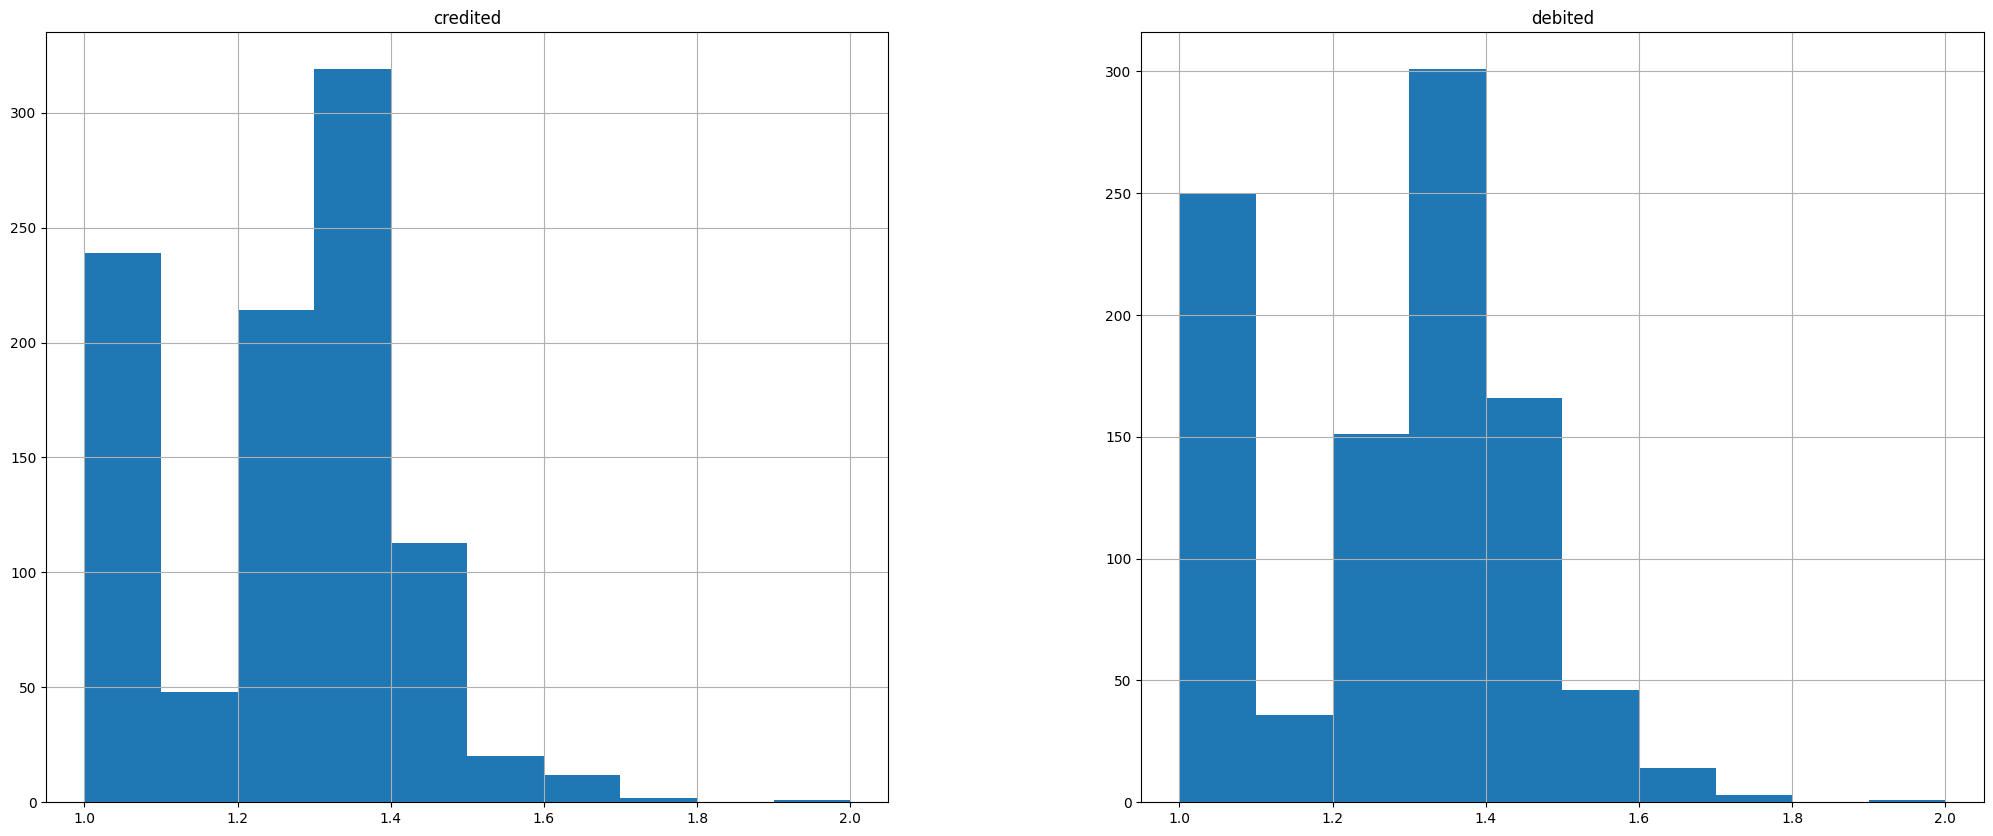

In [16]:
df_escalado[columns_to_scale].hist( bins=10 ,figsize=(25,10))

Como se puede apreciar el las gráficas anteriores, la información no parece tener una mala distribución. Solo parece que existen muchos valores dentro del primer bin, fuera de eso parece una distribución normal buena.

Aún así, aplicaremos una transformación de raíz cuadrada, para verificar si nos arroja una mejor distribución.

In [17]:
#Se crea un nuevo dataframe para almacenar el resultado de la nueva inforamción
df_transformado = df_notnull.copy()

In [18]:
# Transformación logarítmica para las columnas seleccionadas
df_transformado[columns_to_scale] = np.sqrt(df_transformado[columns_to_scale])

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


array([[<Axes: title={'center': 'credited'}>,
        <Axes: title={'center': 'debited'}>]], dtype=object)

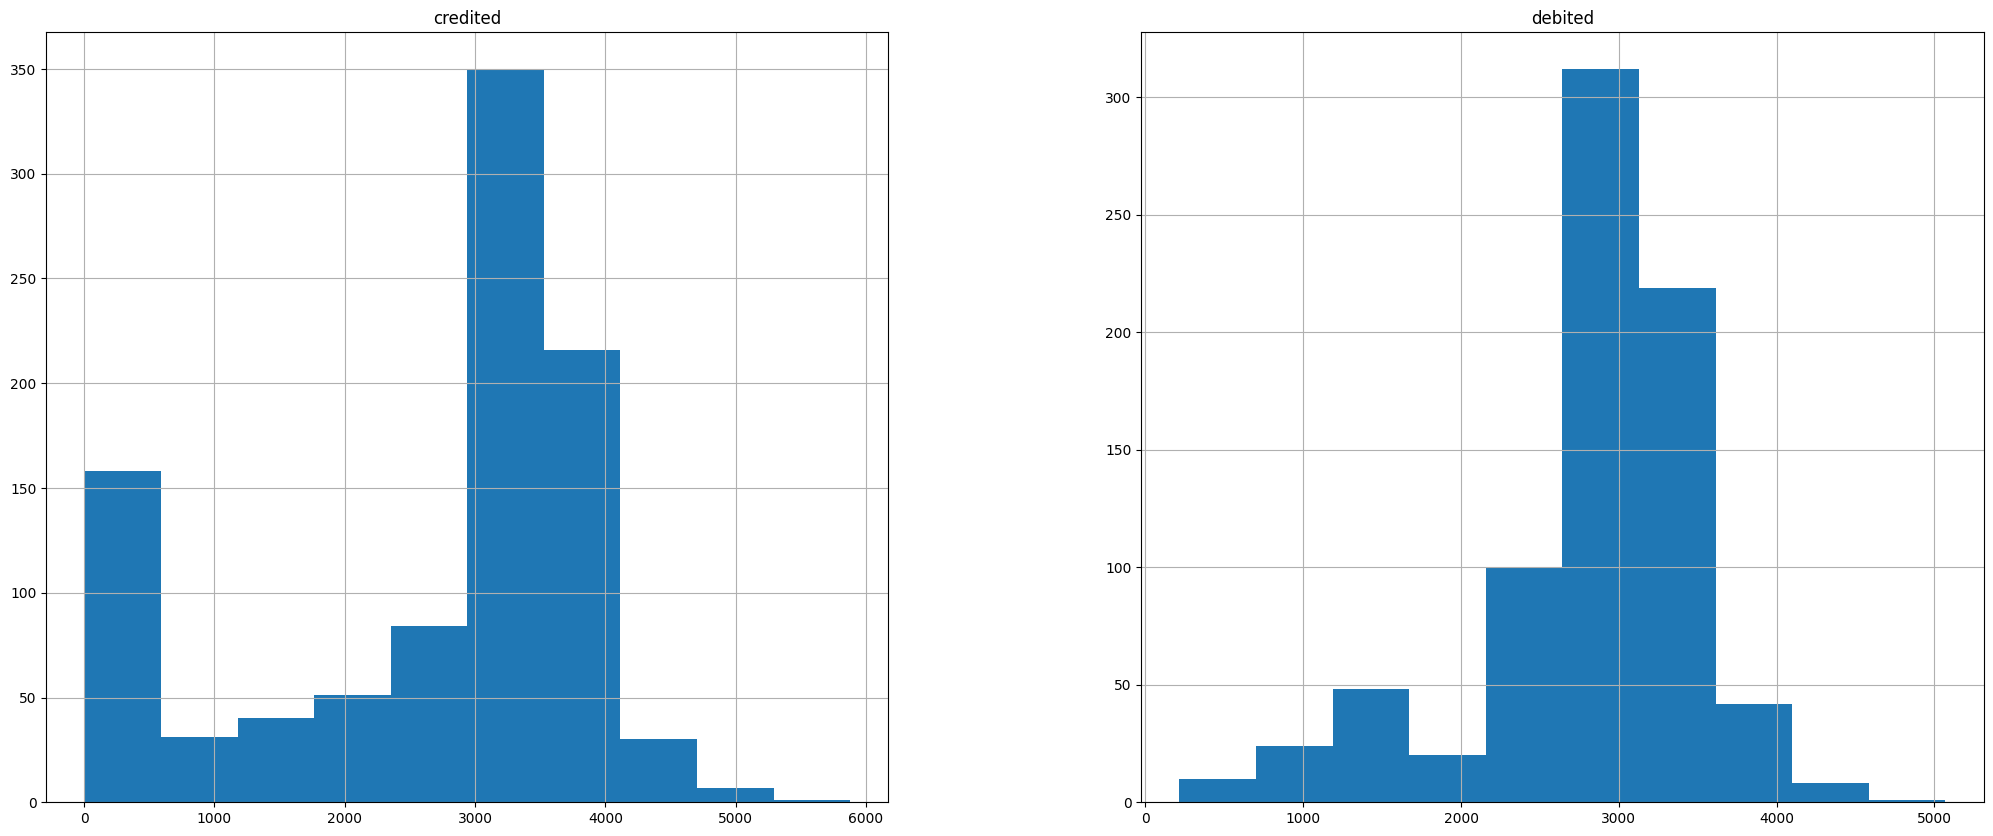

In [19]:
#Ahora, revisaremos el resultado de la operación.
#Y verificaremos que la información tenga una mejor distribución
df_transformado[columns_to_scale].hist( bins=10 ,figsize=(25,10))

In [20]:
df_transformado.describe()

,day,mont,year,credited,debited,week_day,perc_remain
count,968.000000,968.000000,968.000000,968.000000,784.000000,968.000000,968.000000
mean,15.603306,6.632231,2021.341942,2681.474133,2815.756830,3.876033,75.134654
std,8.817327,3.539272,0.847050,1276.270887,704.703485,1.961660,2321.471128
min,1.000000,1.000000,2020.000000,1.697719,215.498300,1.000000,0.120655
25%,8.000000,3.000000,2021.000000,1908.183406,2621.515158,2.000000,0.204447
50%,16.000000,7.000000,2021.000000,3183.542889,2958.874230,4.000000,0.229106
75%,23.000000,10.000000,2022.000000,3549.836976,3221.450619,6.000000,0.420389
max,31.000000,12.000000,2023.000000,5879.142746,5069.030105,7.000000,72227.748430


Con **Boxcox** no se puede aplicar directamente ya que existen valores negativos en la columna de "debited"

Así que intentaremos con Z-score

array([[<Axes: title={'center': 'credited'}>,
        <Axes: title={'center': 'debited'}>]], dtype=object)

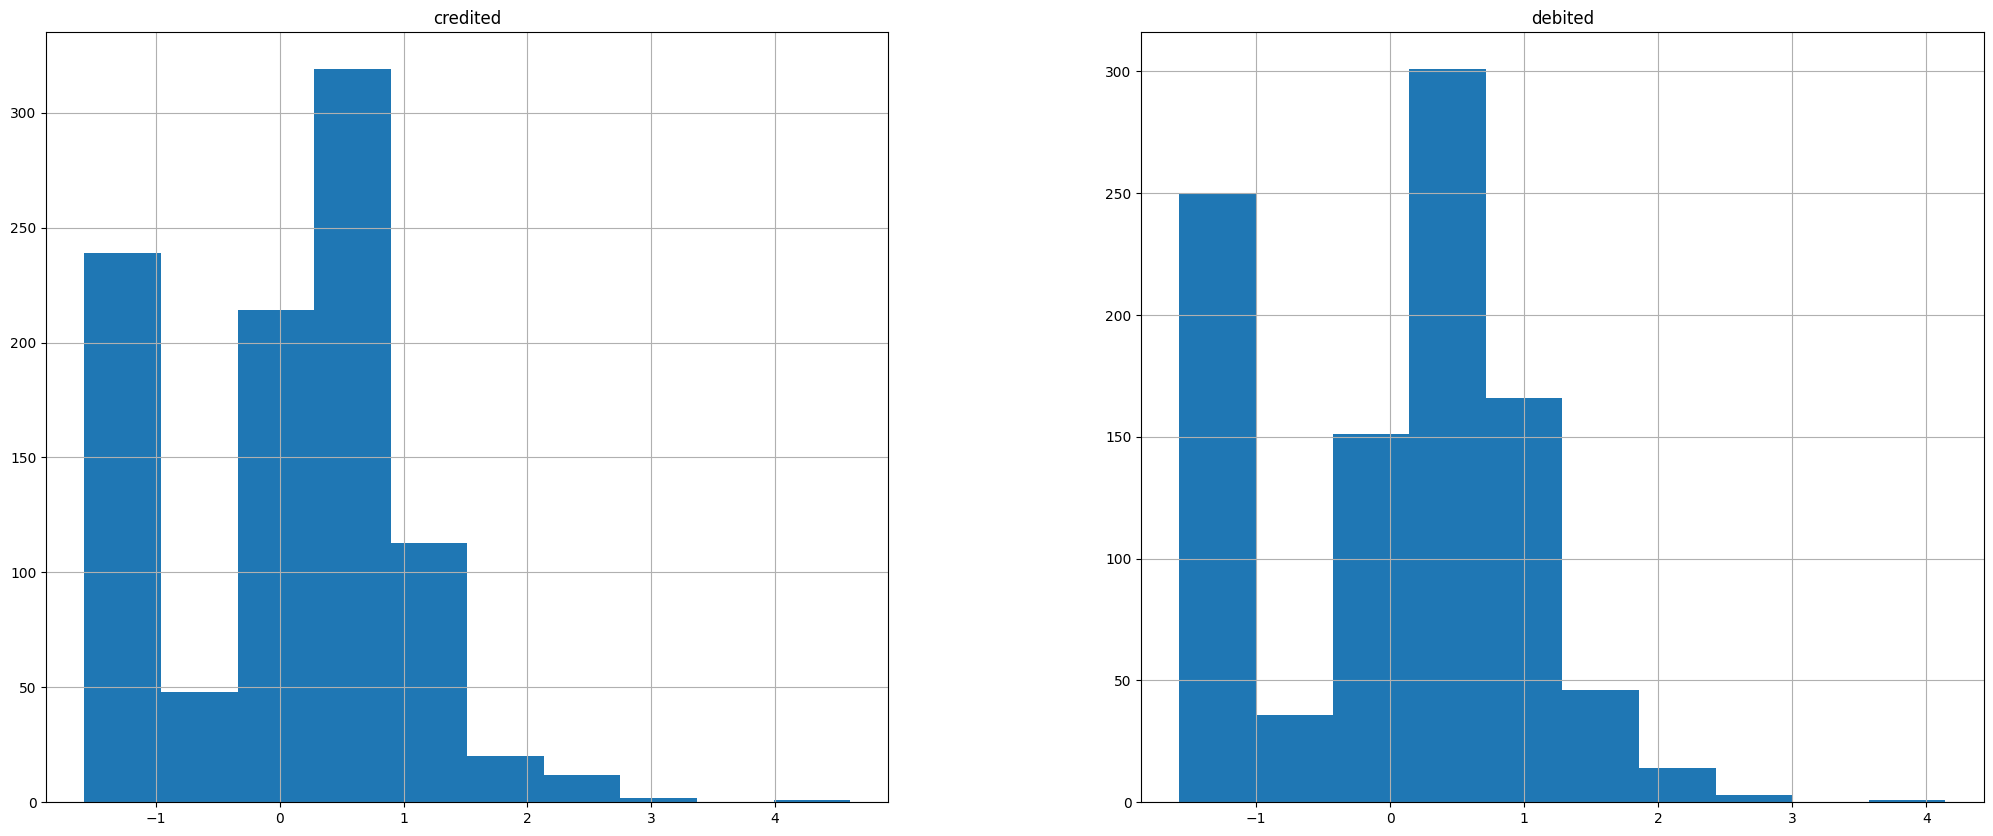

In [21]:
#Se crea el objeto transformador
z_score_scaler = StandardScaler()

#Se vuelve a copiar el dataframe
df_transformado = df_notnull.copy()
#Se aplica la operación de Z-score
df_transformado[columns_to_scale] = z_score_scaler.fit_transform(df_transformado[columns_to_scale])
#Y verificaremos que la información tenga una mejor distribución
df_transformado[columns_to_scale].hist( bins=10 ,figsize=(25,10))

Pues bien, después de haber expereimentado con diferentes técnicas, podemos ver que todas tienen un resultado similar.

Por tanto nos quedaremos con la tecnica más sencilla "raíz cuadrada" de un rango 1 a 2.


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


array([[<Axes: title={'center': 'credited'}>,
        <Axes: title={'center': 'debited'}>]], dtype=object)

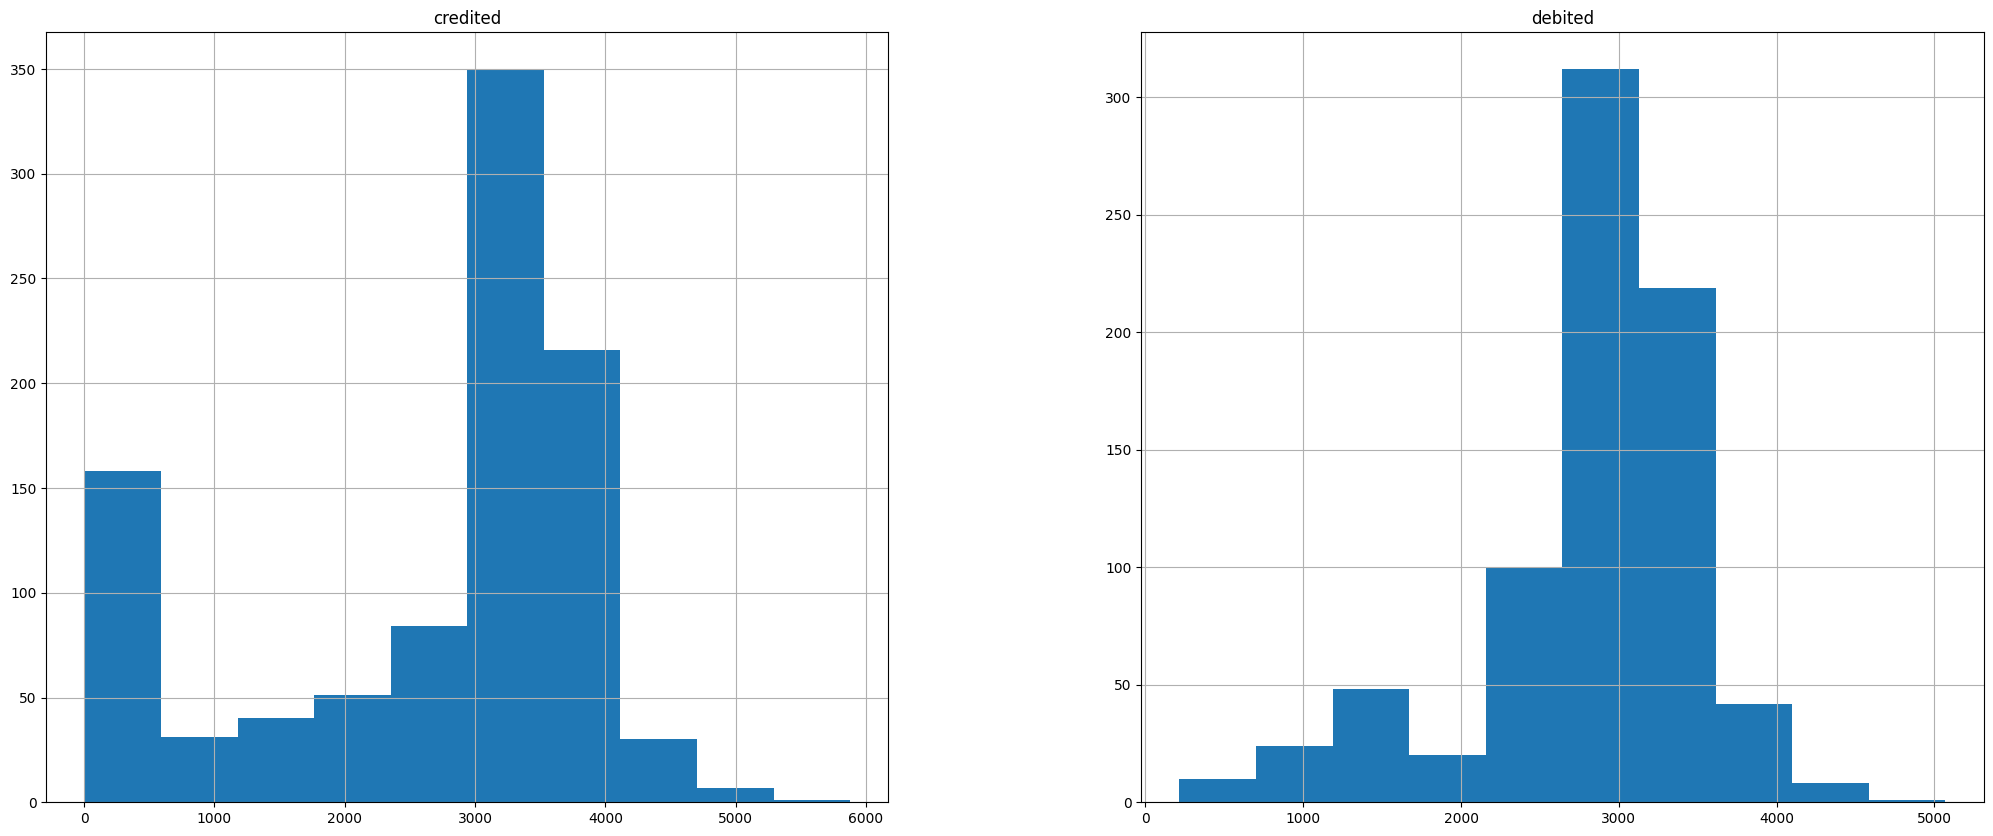

In [22]:
#Se vuelve a copiar el dataframe
df_transformado = df_notnull.copy()
#Se aplica la operación de MinMax
df_transformado[columns_to_scale] = np.sqrt(df_transformado[columns_to_scale])
#Y verificaremos que la información tenga una mejor distribución
df_transformado[columns_to_scale].hist( bins=10 ,figsize=(25,10))

In [23]:
#Revisamos el resultado de las operaciones de transformación
df_escalado.describe()

,day,mont,year,credited,debited,week_day,perc_remain
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,15.603306,6.632231,2021.341942,1.255104,1.274980,3.876033,75.134654
std,8.817327,3.539272,0.847050,0.161684,0.175160,1.961660,2321.471128
min,1.000000,1.000000,2020.000000,1.000000,1.000000,1.000000,0.120655
25%,8.000000,3.000000,2021.000000,1.105345,1.096059,2.000000,0.204447
50%,16.000000,7.000000,2021.000000,1.293220,1.316350,4.000000,0.229106
75%,23.000000,10.000000,2022.000000,1.364577,1.398064,6.000000,0.420389
max,31.000000,12.000000,2023.000000,2.000000,2.000000,7.000000,72227.748430


# **Características más Importantes**

Antes de empezar con el análisis de las características.

Primero vamos a visualizar la correlación entre las columnas.

In [24]:
#Se obtiene la matriz de correlación del Dataframe con el que se está trabajando
MatrizDeCorrelación = df_escalado.corr()
MatrizDeCorrelación

<ipython-input-24-32d042debcda>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  MatrizDeCorrelación = df_escalado.corr()


,day,mont,year,credited,debited,week_day,perc_remain
day,1.000000,0.027265,-0.029588,0.106573,0.107511,-0.000215,-0.013147
mont,0.027265,1.000000,-0.388846,0.033106,0.035026,-0.037704,0.048780
year,-0.029588,-0.388846,1.000000,0.093319,0.094452,0.097731,-0.050944
credited,0.106573,0.033106,0.093319,1.000000,0.996650,-0.621133,-0.050963
debited,0.107511,0.035026,0.094452,0.996650,1.000000,-0.619519,-0.049660
week_day,-0.000215,-0.037704,0.097731,-0.621133,-0.619519,1.000000,0.035002
perc_remain,-0.013147,0.048780,-0.050944,-0.050963,-0.049660,0.035002,1.000000


<Axes: >

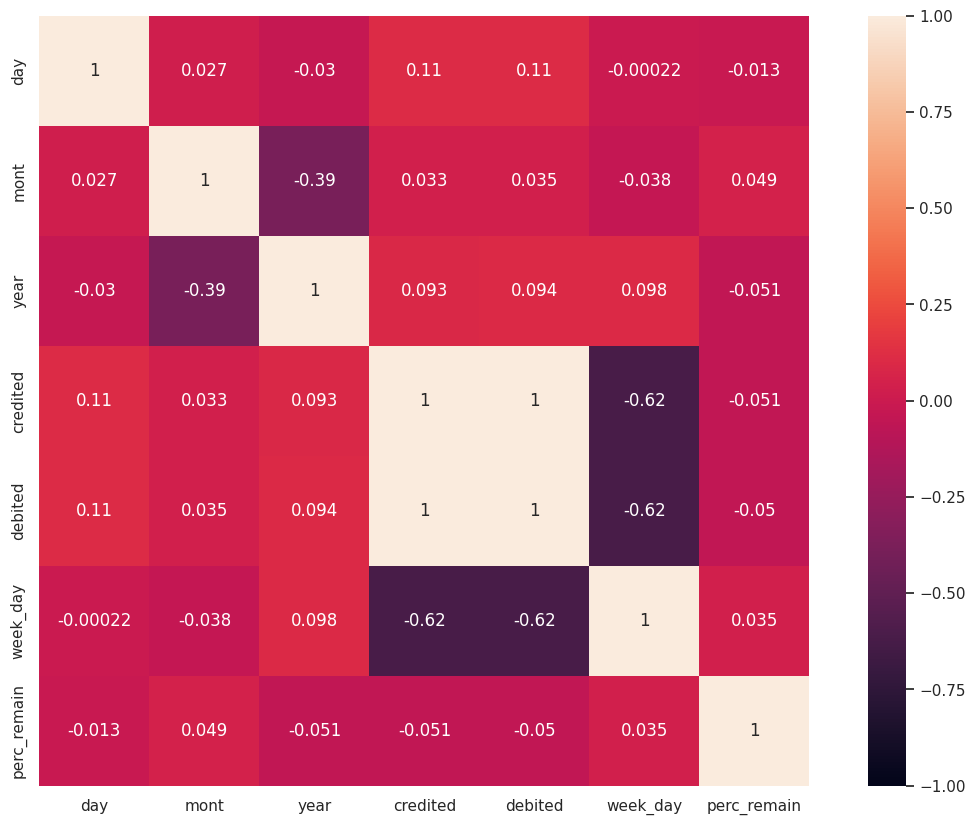

In [25]:
#Ahora visualicemos la información en una gráfica de mapa de calor
sns.set( rc= {'figure.figsize':(15, 10)})
sns.heatmap( MatrizDeCorrelación, vmin = -1, vmax = 1, square=True, annot = True)

Como podemos apreciar, las columnas más relacionadas son "debited" y "credited" y en un tercer lugar estaría "day".

Lo que indicaría que Estas tres características tienen una relación más fuerte entre sí. Tomaremos estas tres columnas para analizar la varianza total de cada una.

In [26]:
#Se crea un dataframe con el que se trabajará
df_pca = df_escalado[["credited","debited","day"]]

#Se comienza con el proceso de análisis de PCA
pcs = PCA()
pcs.fit(df_pca)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3
Standard deviation,8.8174,0.2368,0.0097
Proportion of variance,0.9993,0.0007,0.0000
Cumulative proportion,0.9993,1.0000,1.0000


Ahora presentamos la información de forma visual en una gráfica:

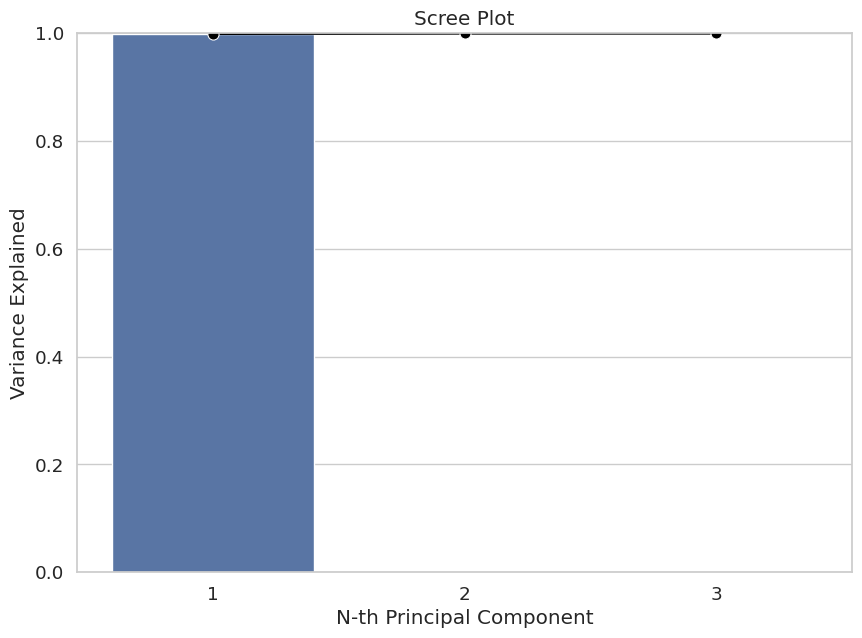

In [27]:
PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components,
                y = pcs.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1,
                 y = np.cumsum(pcs.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Como era de esperarse, la columna de "credited" es la que aporta la mayor información(99%), seguido de la columna de "debited" (0.9%) y el resto lo aporta las demás columnas.

# **Conclusiones**

Con base en el análisis anterior, podemos observar que después de probar con varias transformaciones y con escalamiento minmax, lo que mejor nos dió resultados para lograr una distribución más apegada a la curva normal fue la transformación de raíz cuadrada.

Una vez que se tenía la información cargada y transformada,se realizó un análisis PCA para descubrir la columna que podría aportar mayor información a nuestro futuro modelo. El resultado fue que la columna "credited" era la que aportaba más información. Esto ya era de esperarse debido a la naturaleza de la información.

El equipo se quedó con la inquietud de tratar la columna de "day" con la técnica de "one-hot" para ver si nos genera mejores resultados y ver como afecta la correlación entre columnas. Esta es una posibilidad que se podría tratar en un futuro, o bien, en un modelo paralelo.

Esta inquietud surge a partir de que se tiene la teoría de que solo los días de principio de mes, fin de mes y quincenas tienen efecto en el monto de "credited".
